# PROBLEM STATEMENT


Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is



#### Column names
id=ID

battery_power=Total energy a battery can store in one time measured in mAh

blue=Has bluetooth or not

clock_speed=speed at which microprocessor executes instructions

dual_sim=Has dual sim support or not

fc=Front Camera mega pixels

four_g=Has 4G or not

int_memory=Internal Memory in Gigabytes

m_dep=Mobile Depth in cm

mobile_wt=Weight of mobile phone

### IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train= pd.read_csv('train.csv')

In [2]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
test= pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


#### Data Understanding

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
test.shape

(1000, 21)

In [6]:
train["Train"] = 1
test["Train"] = 0

In [7]:
data = pd.concat([train, test],sort=False)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Train,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1.0,1,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2.0,1,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2.0,1,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2.0,1,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1.0,1,NaN


In [8]:
data.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
Train               0
id               2000
dtype: int64

In [9]:
data.duplicated().sum()

0

### EDA

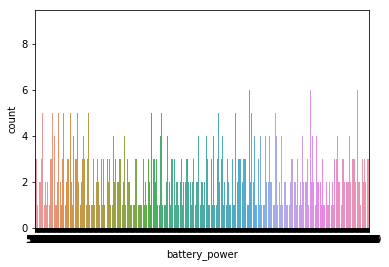

In [10]:
sns.countplot(data['battery_power'])

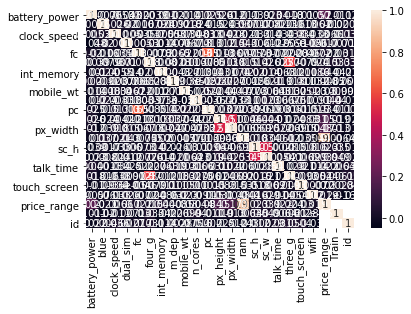

In [11]:
sns.heatmap(data.corr(),annot=True)

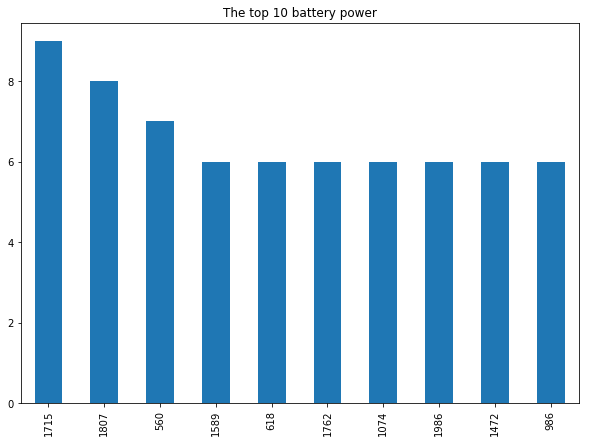

In [12]:
data['battery_power'].value_counts()[:10].plot(kind = 'bar', figsize = (10, 7), title = 'The top 10 battery power')

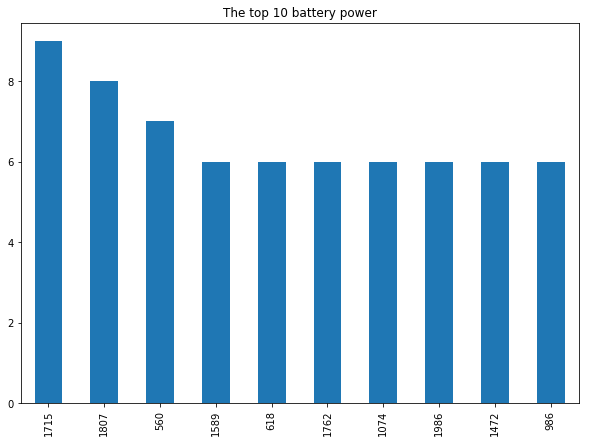

In [13]:
data['battery_power'].value_counts()[:10].plot(kind = 'bar', figsize = (10, 7), title = 'The top 10 battery power')

In [14]:
data['battery_power'].value_counts()

1715    9
1807    8
560     7
1589    6
618     6
       ..
1279    1
679     1
1158    1
1160    1
1999    1
Name: battery_power, Length: 1275, dtype: int64

In [15]:
data['battery_power'].unique()

array([ 842, 1021,  563, ...,  971,  905, 1797], dtype=int64)

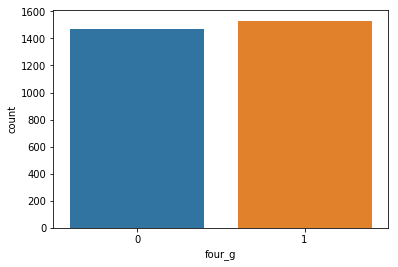

In [16]:
sns.countplot(data['four_g'])

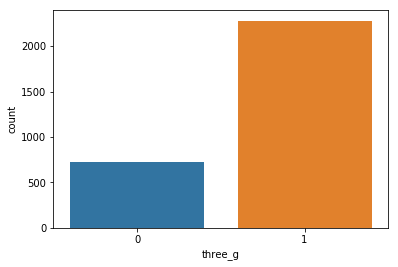

In [17]:
sns.countplot(data['three_g'])

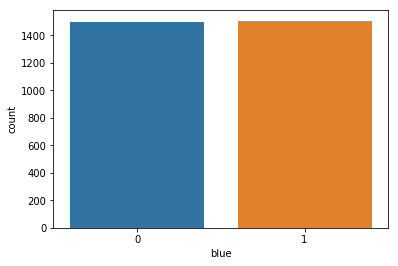

In [18]:
sns.countplot(data['blue'])

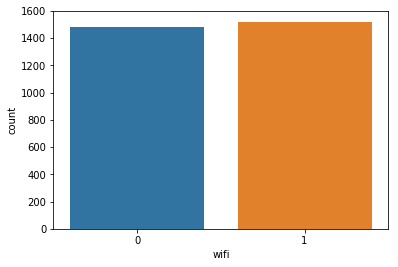

In [19]:
sns.countplot(data['wifi'])

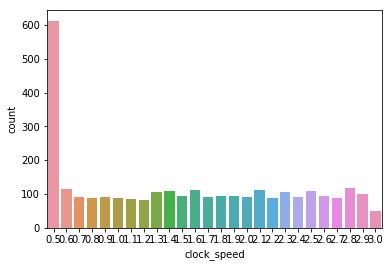

In [20]:
sns.countplot(data['clock_speed'])

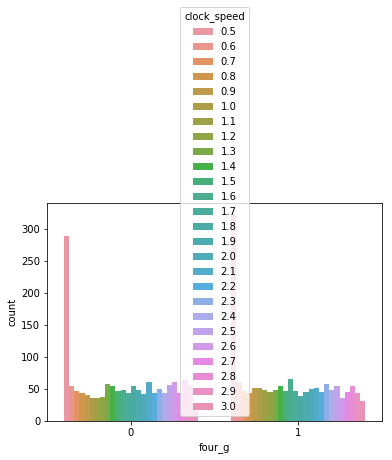

In [21]:
sns.countplot(data=data,x='four_g',hue='clock_speed')

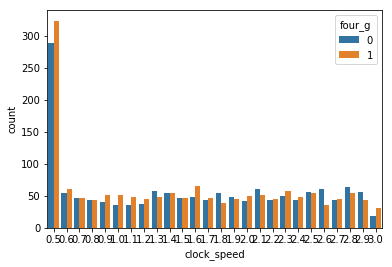

In [22]:
sns.countplot(data=data,x='clock_speed',hue='four_g')

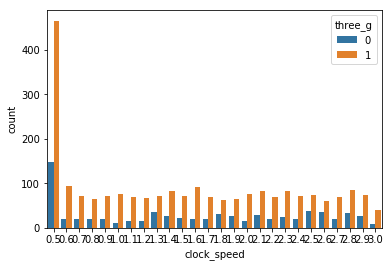

In [23]:
sns.countplot(data=data,x='clock_speed',hue='three_g')

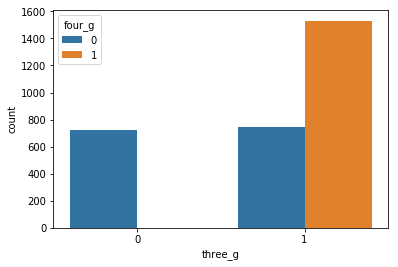

In [24]:
sns.countplot(data=data,x='three_g',hue='four_g')

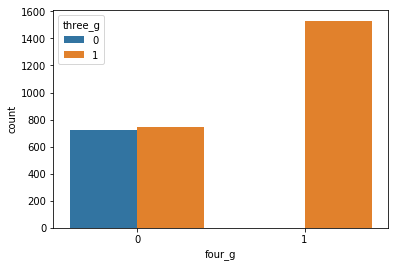

In [25]:
sns.countplot(data=data,x='four_g',hue='three_g')

In [26]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'Train', 'id'],
      dtype='object')

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2082: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


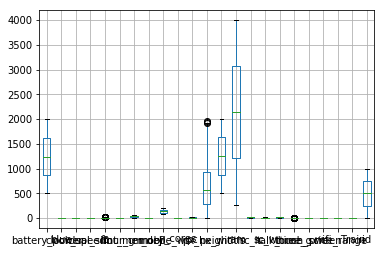

In [27]:
df = pd.DataFrame(data = data, columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'Train', 'id'])
df.boxplot()

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


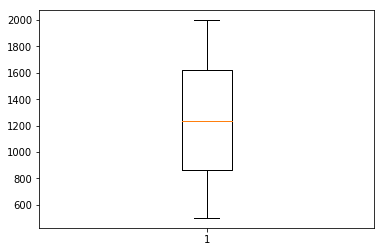

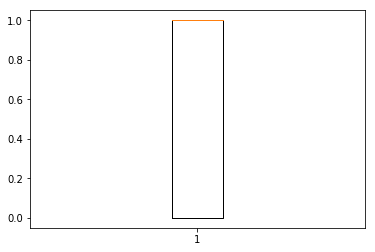

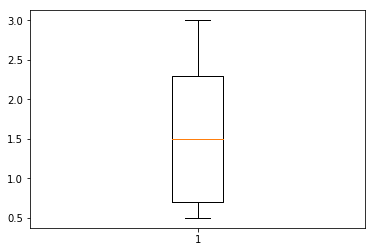

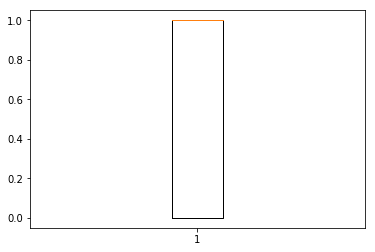

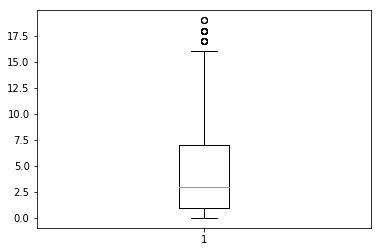

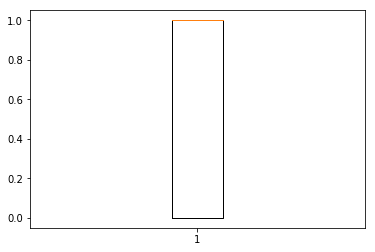

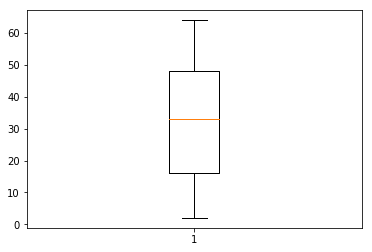

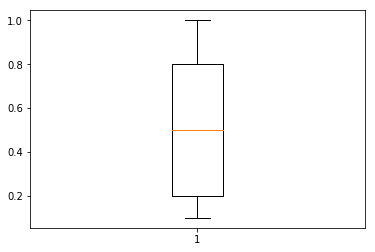

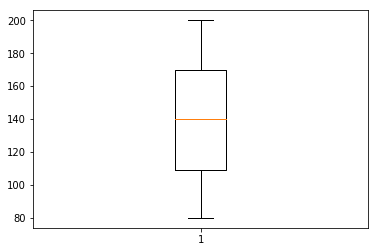

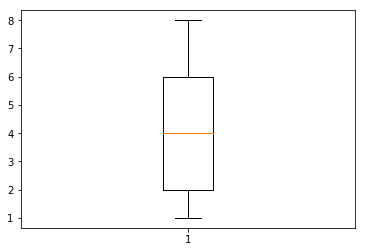

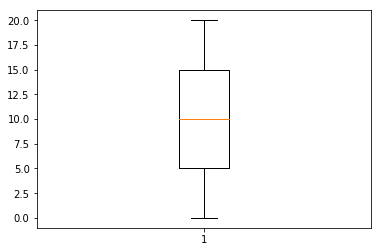

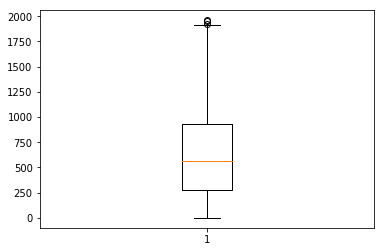

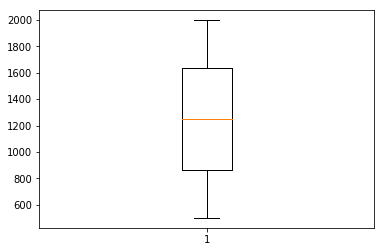

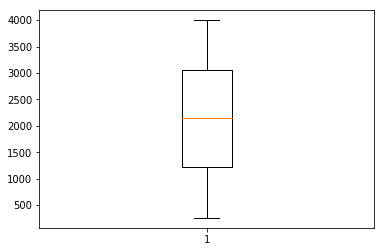

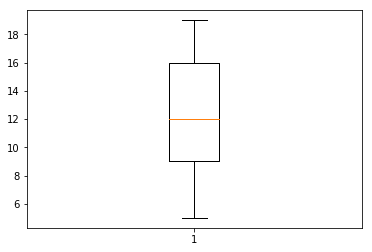

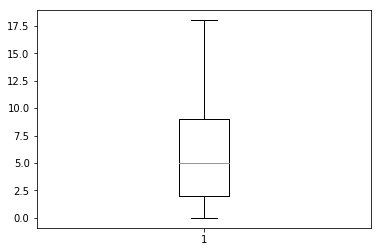

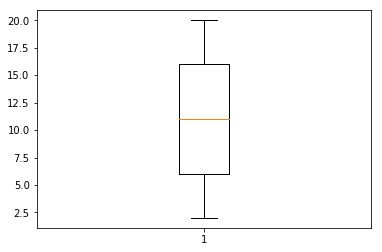

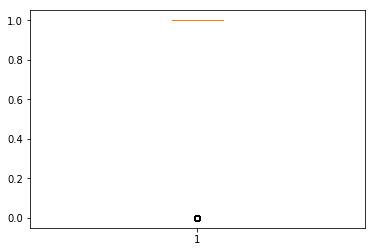

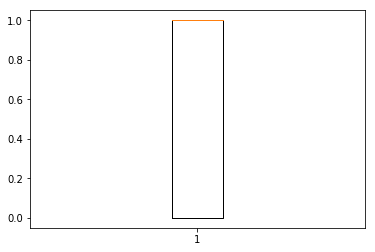

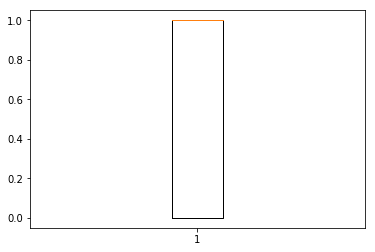

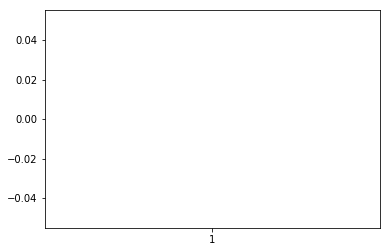

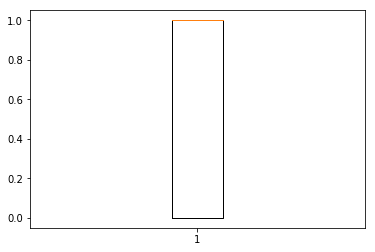

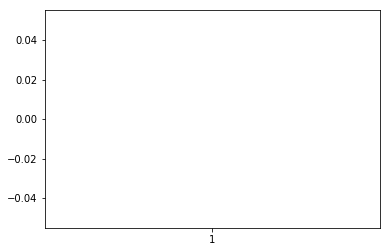

In [28]:
int_col=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'Train', 'id']
for i in int_col:
    plt.figure()
    plt.boxplot(data[i])

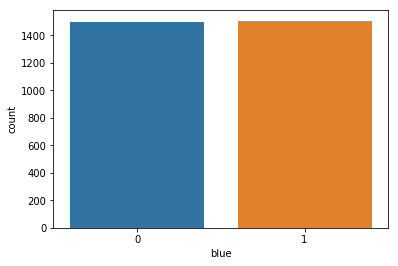

In [29]:
sns.countplot(data['blue'])

In [30]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'Train'],
      dtype='object')

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


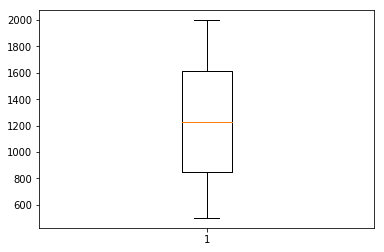

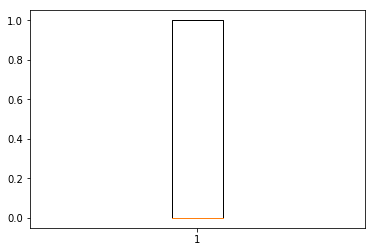

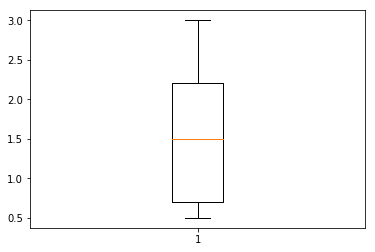

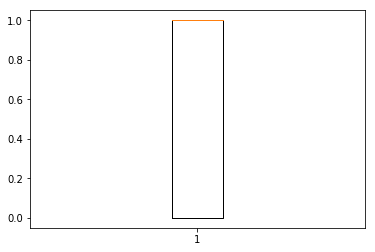

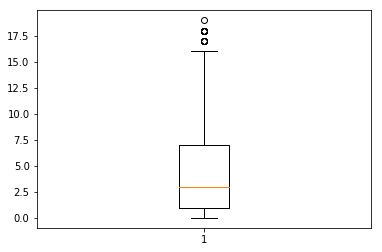

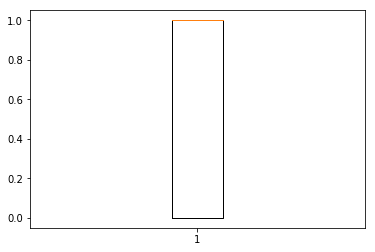

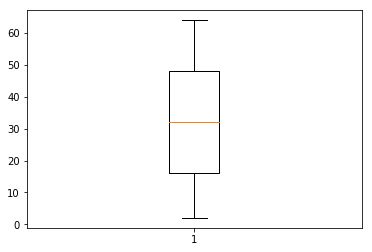

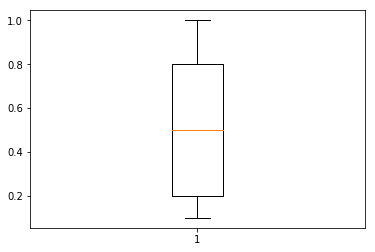

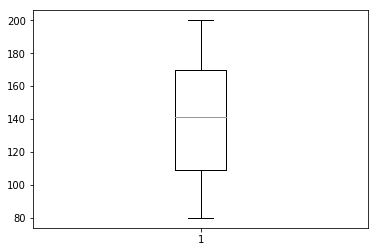

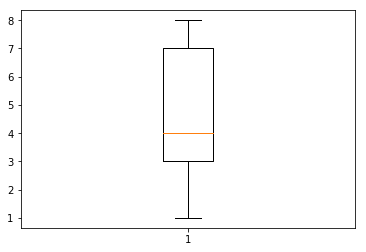

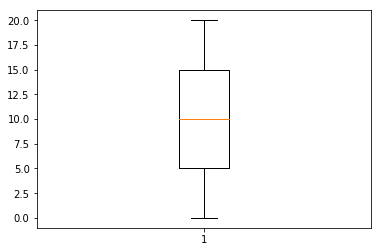

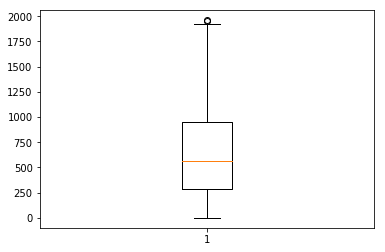

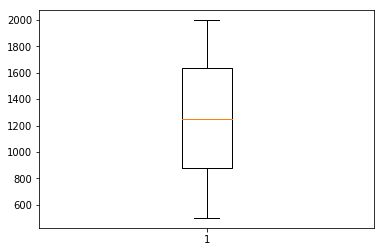

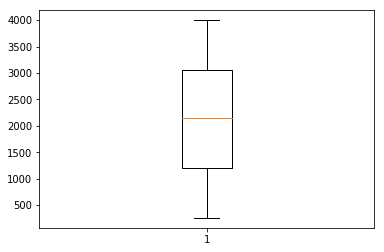

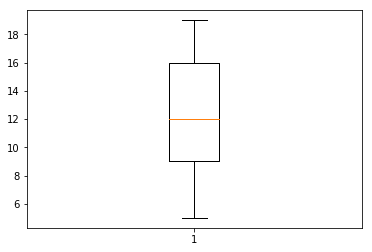

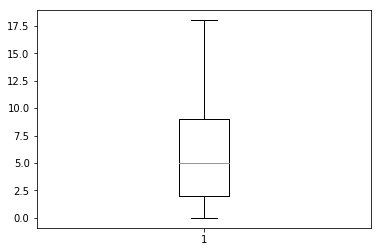

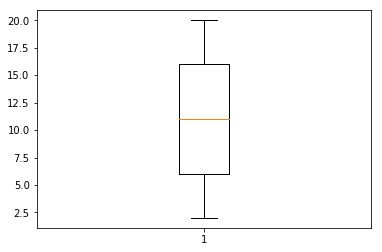

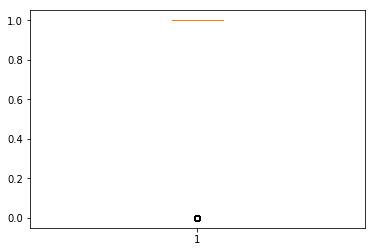

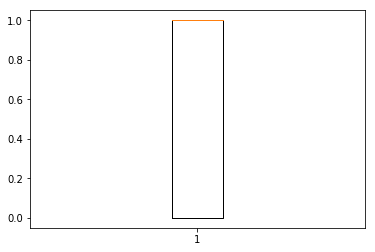

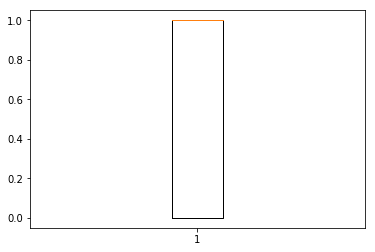

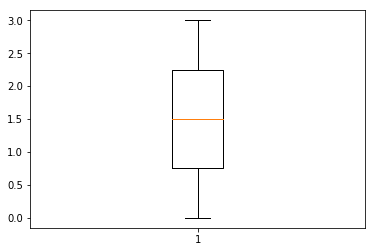

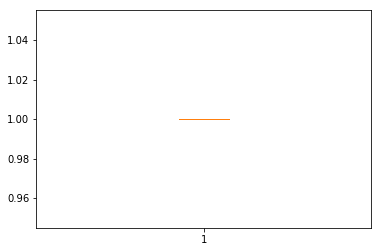

In [31]:
int_col=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'Train']
for i in int_col:
    plt.figure()
    plt.boxplot(train[i])

In [32]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'Train'],
      dtype='object')

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


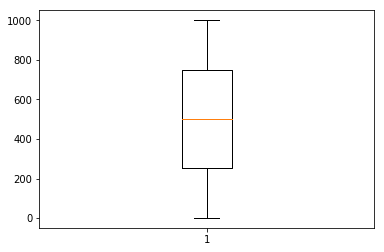

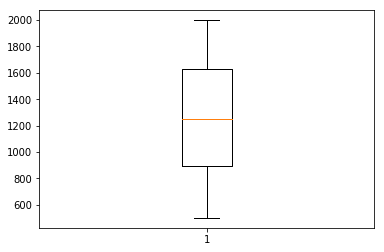

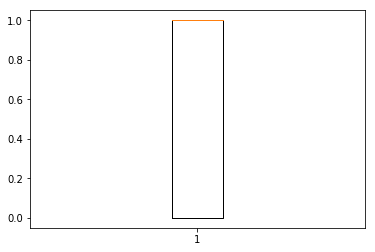

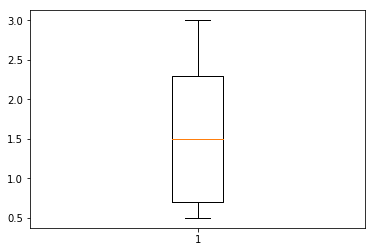

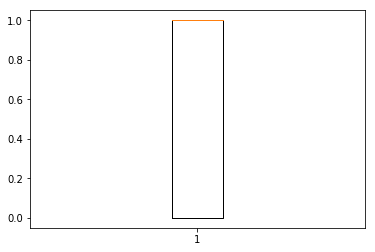

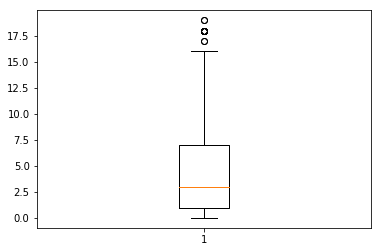

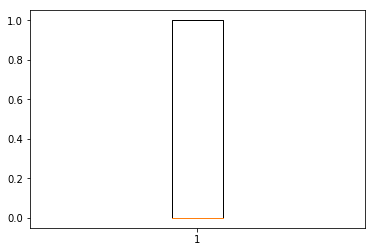

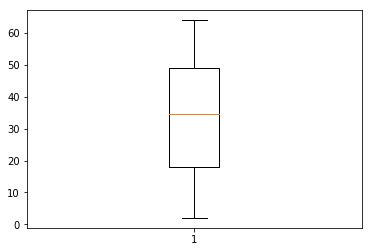

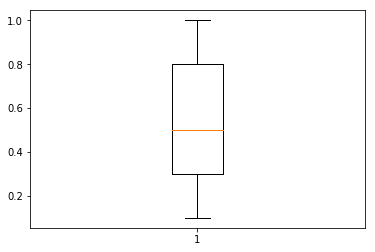

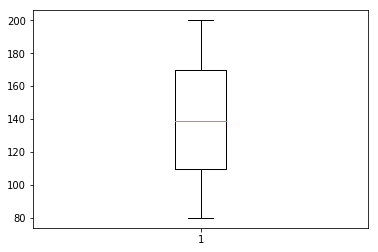

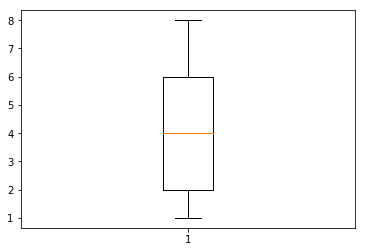

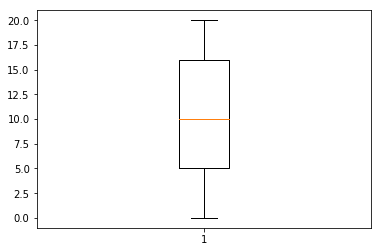

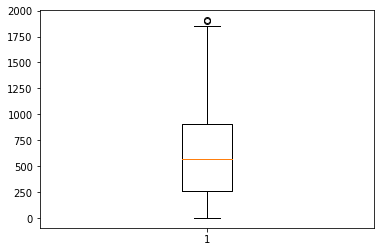

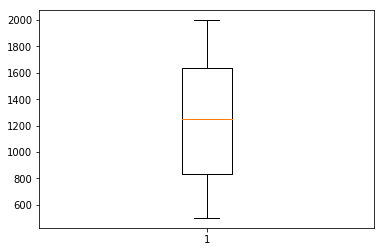

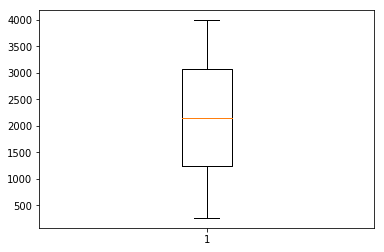

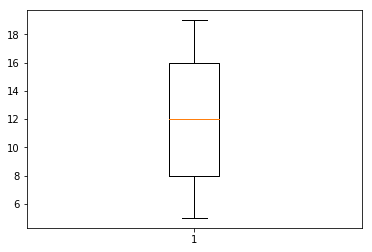

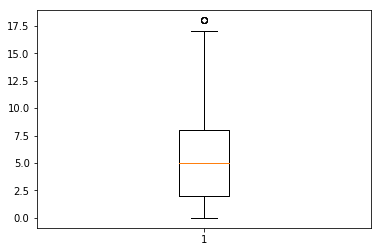

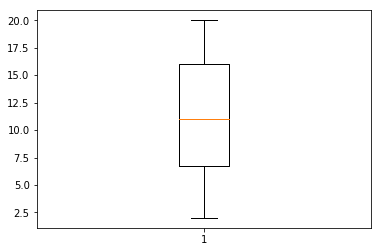

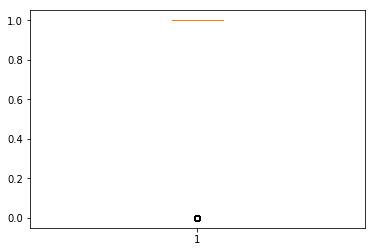

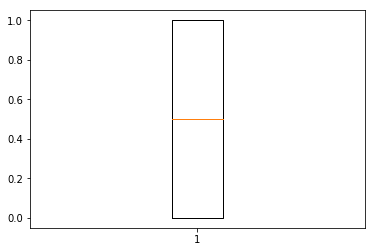

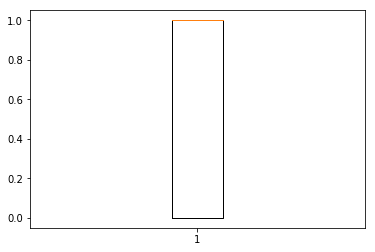

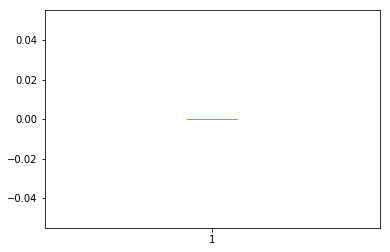

In [33]:
int_col=['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'Train']
for i in int_col:
    plt.figure()
    plt.boxplot(test[i])

##### Positively Skewed:
If the distance from the median to the maximum is greater than the distance from the median to the minimum, then the box plot is positively skewed.

##### Negatively Skewed: 
If the distance from the median to minimum is greater than the distance from the median to the maximum, then the box plot is negatively skewed.

##### Symmetric: 
The box plot is said to be symmetric if the median is equidistant from the maximum and minimum values.

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 206.0151766004415)

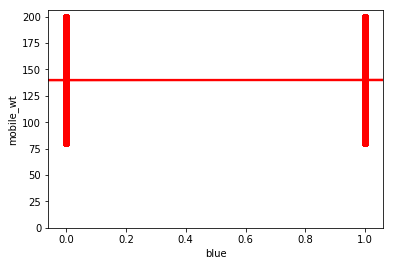

In [34]:
sns.regplot(x="blue", y='mobile_wt', color="red", data=data)
plt.ylim(0,)

sns.distplot(y_test-grid_pred)

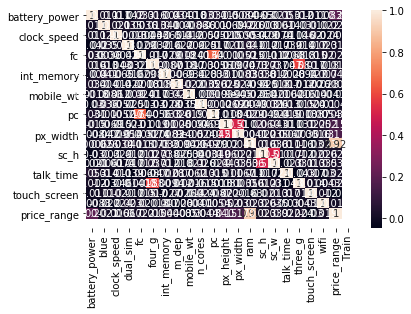

In [35]:
sns.heatmap(train.corr(),annot=True)

In [36]:
#splitting the data back to train and test
train=train.drop(['Train'],axis=1)
test=test.drop(['Train'],axis=1)

sns.heatmap(x.corr(),annot=True)

#### Feature selection

In [37]:
from sklearn.feature_selection import SelectKBest# also caled information gain
from sklearn.feature_selection import chi2

In [42]:
features = SelectKBest(score_func=chi2,k='all')
# k is the number of features to be selected,score_func choose relevant variable in respect to indepent variable(y)
#SelcetKBest works with numerical values
X = train.iloc[:, :-1]

In [39]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [41]:
y=train.iloc[:, -1]
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [45]:
ordered_features = features.fit(X,y)
df_scores = pd.DataFrame(ordered_features.scores_, columns = ['scores'])#selected features
df_columns = pd.DataFrame(X.columns)

In [47]:
feature_rank = pd.concat([df_columns, df_scores],axis=1)
feature_rank.columns = ['Features','Score']
feature_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [48]:
feature_rank.isnull().sum()

Features    0
Score       0
dtype: int64

In [51]:
feature_rank.nlargest(10,'Score')#ten most important features for model with respect to the score also can work with features

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [57]:
x=train.loc[:,['ram','battery_power','px_height','px_width','mobile_wt','sc_w','talk_time','fc','sc_h','int_memory']]
y=train['price_range']

In [58]:
x.head()

,ram,battery_power,px_height,px_width,mobile_wt,sc_w,talk_time,fc,sc_h,int_memory
0,2549,842,20,756,188,7,19,1,9,7
1,2631,1021,905,1988,136,3,7,0,17,53
2,2603,563,1263,1716,145,2,9,2,11,41
3,2769,615,1216,1786,131,8,11,0,16,10
4,1411,1821,1208,1212,141,2,15,13,8,44


### Modeling

In [59]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
y_train=sc.fit_transform(x_test)

In [60]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
svc= SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [61]:
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.955
[[150   3   0   0]
 [  7 138   2   0]
 [  0   8 137   4]
 [  0   0   3 148]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       153
           1       0.93      0.94      0.93       147
           2       0.96      0.92      0.94       149
           3       0.97      0.98      0.98       151

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.95      0.95       600



In [62]:
import catboost as cb 
mcb = cb.CatBoostClassifier()
mcb.fit(x_train, y_train)
print(mcb)

Learning rate set to 0.080496
0:	learn: 1.2948667	total: 155ms	remaining: 2m 34s
1:	learn: 1.1849568	total: 179ms	remaining: 1m 29s
2:	learn: 1.1092410	total: 204ms	remaining: 1m 7s
3:	learn: 1.0423249	total: 230ms	remaining: 57.2s
4:	learn: 0.9803174	total: 256ms	remaining: 51s
5:	learn: 0.9293487	total: 286ms	remaining: 47.4s
6:	learn: 0.8840117	total: 312ms	remaining: 44.3s
7:	learn: 0.8467615	total: 339ms	remaining: 42s
8:	learn: 0.8083382	total: 377ms	remaining: 41.5s
9:	learn: 0.7689905	total: 405ms	remaining: 40.1s
10:	learn: 0.7353925	total: 431ms	remaining: 38.8s
11:	learn: 0.7097196	total: 456ms	remaining: 37.6s
12:	learn: 0.6793492	total: 484ms	remaining: 36.8s
13:	learn: 0.6526481	total: 512ms	remaining: 36s
14:	learn: 0.6235037	total: 540ms	remaining: 35.5s
15:	learn: 0.5995575	total: 565ms	remaining: 34.7s
16:	learn: 0.5772215	total: 601ms	remaining: 34.8s
17:	learn: 0.5633280	total: 631ms	remaining: 34.4s
18:	learn: 0.5419803	total: 659ms	remaining: 34s
19:	learn: 0.5255

171:	learn: 0.1245182	total: 4.14s	remaining: 19.9s
172:	learn: 0.1237342	total: 4.16s	remaining: 19.9s
173:	learn: 0.1232933	total: 4.18s	remaining: 19.8s
174:	learn: 0.1222213	total: 4.2s	remaining: 19.8s
175:	learn: 0.1215649	total: 4.22s	remaining: 19.8s
176:	learn: 0.1212712	total: 4.23s	remaining: 19.7s
177:	learn: 0.1205925	total: 4.25s	remaining: 19.6s
178:	learn: 0.1200561	total: 4.26s	remaining: 19.6s
179:	learn: 0.1194511	total: 4.28s	remaining: 19.5s
180:	learn: 0.1189364	total: 4.29s	remaining: 19.4s
181:	learn: 0.1182908	total: 4.31s	remaining: 19.4s
182:	learn: 0.1177012	total: 4.32s	remaining: 19.3s
183:	learn: 0.1174027	total: 4.34s	remaining: 19.3s
184:	learn: 0.1171868	total: 4.36s	remaining: 19.2s
185:	learn: 0.1166707	total: 4.37s	remaining: 19.1s
186:	learn: 0.1163738	total: 4.39s	remaining: 19.1s
187:	learn: 0.1160367	total: 4.4s	remaining: 19s
188:	learn: 0.1153429	total: 4.42s	remaining: 19s
189:	learn: 0.1145461	total: 4.43s	remaining: 18.9s
190:	learn: 0.1144

330:	learn: 0.0700508	total: 8.21s	remaining: 16.6s
331:	learn: 0.0699410	total: 8.26s	remaining: 16.6s
332:	learn: 0.0697282	total: 8.3s	remaining: 16.6s
333:	learn: 0.0695875	total: 8.35s	remaining: 16.6s
334:	learn: 0.0693043	total: 8.38s	remaining: 16.6s
335:	learn: 0.0692139	total: 8.42s	remaining: 16.6s
336:	learn: 0.0688392	total: 8.46s	remaining: 16.6s
337:	learn: 0.0685874	total: 8.5s	remaining: 16.6s
338:	learn: 0.0683699	total: 8.53s	remaining: 16.6s
339:	learn: 0.0681068	total: 8.56s	remaining: 16.6s
340:	learn: 0.0678389	total: 8.6s	remaining: 16.6s
341:	learn: 0.0675733	total: 8.65s	remaining: 16.6s
342:	learn: 0.0672537	total: 8.7s	remaining: 16.7s
343:	learn: 0.0670339	total: 8.73s	remaining: 16.6s
344:	learn: 0.0668893	total: 8.76s	remaining: 16.6s
345:	learn: 0.0667456	total: 8.8s	remaining: 16.6s
346:	learn: 0.0665504	total: 8.83s	remaining: 16.6s
347:	learn: 0.0663326	total: 8.86s	remaining: 16.6s
348:	learn: 0.0660919	total: 8.92s	remaining: 16.6s
349:	learn: 0.065

494:	learn: 0.0450808	total: 12.4s	remaining: 12.6s
495:	learn: 0.0449888	total: 12.4s	remaining: 12.6s
496:	learn: 0.0448944	total: 12.4s	remaining: 12.6s
497:	learn: 0.0447242	total: 12.4s	remaining: 12.5s
498:	learn: 0.0445875	total: 12.4s	remaining: 12.5s
499:	learn: 0.0445066	total: 12.5s	remaining: 12.5s
500:	learn: 0.0443695	total: 12.5s	remaining: 12.4s
501:	learn: 0.0442462	total: 12.5s	remaining: 12.4s
502:	learn: 0.0441409	total: 12.5s	remaining: 12.3s
503:	learn: 0.0440356	total: 12.5s	remaining: 12.3s
504:	learn: 0.0439022	total: 12.5s	remaining: 12.3s
505:	learn: 0.0438499	total: 12.5s	remaining: 12.2s
506:	learn: 0.0437629	total: 12.6s	remaining: 12.2s
507:	learn: 0.0436668	total: 12.6s	remaining: 12.2s
508:	learn: 0.0436369	total: 12.6s	remaining: 12.1s
509:	learn: 0.0434739	total: 12.6s	remaining: 12.1s
510:	learn: 0.0434434	total: 12.6s	remaining: 12.1s
511:	learn: 0.0433741	total: 12.6s	remaining: 12s
512:	learn: 0.0433235	total: 12.7s	remaining: 12s
513:	learn: 0.04

664:	learn: 0.0317782	total: 15s	remaining: 7.55s
665:	learn: 0.0317323	total: 15s	remaining: 7.53s
666:	learn: 0.0316445	total: 15s	remaining: 7.51s
667:	learn: 0.0316010	total: 15.1s	remaining: 7.48s
668:	learn: 0.0315502	total: 15.1s	remaining: 7.45s
669:	learn: 0.0314733	total: 15.1s	remaining: 7.42s
670:	learn: 0.0314018	total: 15.1s	remaining: 7.4s
671:	learn: 0.0313648	total: 15.1s	remaining: 7.37s
672:	learn: 0.0313038	total: 15.1s	remaining: 7.34s
673:	learn: 0.0312064	total: 15.1s	remaining: 7.32s
674:	learn: 0.0311600	total: 15.1s	remaining: 7.29s
675:	learn: 0.0311111	total: 15.2s	remaining: 7.26s
676:	learn: 0.0310688	total: 15.2s	remaining: 7.24s
677:	learn: 0.0310140	total: 15.2s	remaining: 7.21s
678:	learn: 0.0309352	total: 15.2s	remaining: 7.19s
679:	learn: 0.0308724	total: 15.2s	remaining: 7.17s
680:	learn: 0.0308380	total: 15.2s	remaining: 7.14s
681:	learn: 0.0307901	total: 15.3s	remaining: 7.11s
682:	learn: 0.0306960	total: 15.3s	remaining: 7.08s
683:	learn: 0.03062

824:	learn: 0.0244553	total: 17.6s	remaining: 3.74s
825:	learn: 0.0244248	total: 17.6s	remaining: 3.71s
826:	learn: 0.0243962	total: 17.7s	remaining: 3.69s
827:	learn: 0.0243734	total: 17.7s	remaining: 3.67s
828:	learn: 0.0243328	total: 17.7s	remaining: 3.65s
829:	learn: 0.0243087	total: 17.7s	remaining: 3.63s
830:	learn: 0.0242480	total: 17.7s	remaining: 3.6s
831:	learn: 0.0242108	total: 17.7s	remaining: 3.58s
832:	learn: 0.0241749	total: 17.7s	remaining: 3.56s
833:	learn: 0.0241399	total: 17.8s	remaining: 3.54s
834:	learn: 0.0241063	total: 17.8s	remaining: 3.51s
835:	learn: 0.0240720	total: 17.8s	remaining: 3.49s
836:	learn: 0.0240222	total: 17.8s	remaining: 3.47s
837:	learn: 0.0239878	total: 17.8s	remaining: 3.45s
838:	learn: 0.0239570	total: 17.8s	remaining: 3.42s
839:	learn: 0.0239147	total: 17.9s	remaining: 3.4s
840:	learn: 0.0238937	total: 17.9s	remaining: 3.38s
841:	learn: 0.0238245	total: 17.9s	remaining: 3.36s
842:	learn: 0.0238106	total: 17.9s	remaining: 3.33s
843:	learn: 0.

987:	learn: 0.0194435	total: 20.4s	remaining: 248ms
988:	learn: 0.0194194	total: 20.5s	remaining: 228ms
989:	learn: 0.0193947	total: 20.6s	remaining: 208ms
990:	learn: 0.0193788	total: 20.6s	remaining: 187ms
991:	learn: 0.0193582	total: 20.7s	remaining: 167ms
992:	learn: 0.0193318	total: 20.8s	remaining: 146ms
993:	learn: 0.0193104	total: 20.8s	remaining: 126ms
994:	learn: 0.0192867	total: 20.9s	remaining: 105ms
995:	learn: 0.0192635	total: 21s	remaining: 84.2ms
996:	learn: 0.0192530	total: 21s	remaining: 63.2ms
997:	learn: 0.0192136	total: 21.1s	remaining: 42.2ms
998:	learn: 0.0191916	total: 21.1s	remaining: 21.1ms
999:	learn: 0.0191789	total: 21.2s	remaining: 0us


In [63]:
y_pred = mcb.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.94
[[146   7   0   0]
 [ 10 133   4   0]
 [  0   8 140   1]
 [  0   0   6 145]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       153
           1       0.90      0.90      0.90       147
           2       0.93      0.94      0.94       149
           3       0.99      0.96      0.98       151

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
print(rfc)

RandomForestClassifier()


In [65]:
y_pred = rfc.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8833333333333333
[[143  10   0   0]
 [ 13 130   4   0]
 [  0  17 123   9]
 [  0   0  17 134]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       153
           1       0.83      0.88      0.86       147
           2       0.85      0.83      0.84       149
           3       0.94      0.89      0.91       151

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



#### Naive Bayes Classifier

In [66]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [67]:
y_pred =classifier.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.805
[[133  20   0   0]
 [ 14 106  27   0]
 [  0  31 110   8]
 [  0   0  17 134]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       153
           1       0.68      0.72      0.70       147
           2       0.71      0.74      0.73       149
           3       0.94      0.89      0.91       151

    accuracy                           0.81       600
   macro avg       0.81      0.80      0.81       600
weighted avg       0.81      0.81      0.81       600



#### Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
clasifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 11)
clasifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=11)

In [70]:
y_pred =clasifier.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.88
[[141  11   1   0]
 [  7 126  14   0]
 [  0   9 125  15]
 [  0   0  15 136]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       153
           1       0.86      0.86      0.86       147
           2       0.81      0.84      0.82       149
           3       0.90      0.90      0.90       151

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



#### Kernel SVM

In [74]:
mysvm = SVC(kernel = 'rbf', random_state = 11)
mysvm.fit(x_train, y_train)

SVC(random_state=11)

In [76]:
y_pred =mysvm.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.955
[[150   3   0   0]
 [  7 138   2   0]
 [  0   8 137   4]
 [  0   0   3 148]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       153
           1       0.93      0.94      0.93       147
           2       0.96      0.92      0.94       149
           3       0.97      0.98      0.98       151

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.95      0.95       600



#### Normal SVM

In [79]:
from sklearn.svm import SVC
nsvm = SVC(kernel = 'linear', random_state = 11)
nsvm.fit(x_train, y_train)

SVC(kernel='linear', random_state=11)

In [80]:
y_pred =nsvm.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.9866666666666667
[[153   0   0   0]
 [  0 144   3   0]
 [  0   2 144   3]
 [  0   0   0 151]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       0.99      0.98      0.98       147
           2       0.98      0.97      0.97       149
           3       0.98      1.00      0.99       151

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred =knn.predict(x_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.93
[[149   4   0   0]
 [  6 135   6   0]
 [  0  10 131   8]
 [  0   0   8 143]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       153
           1       0.91      0.92      0.91       147
           2       0.90      0.88      0.89       149
           3       0.95      0.95      0.95       151

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid= GridSearchCV(SVC(),param_grid,refit= True,verbose=2)#verbose= 2 means one line per epoch,epoch means iterations
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.0s
[CV] END .....................................C=0.1, gamma=1; total time=   1.1s
[CV] END .....................................C=0.1, gamma=1; total time=   1.1s
[CV] END .....................................C=0.1, gamma=1; total time=   1.1s
[CV] END .....................................C=0.1, gamma=1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [87]:
grid_pred= grid.predict(x_test)
print(f'Accuracy Score: {metrics.accuracy_score(y_test,grid_pred)}')
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

Accuracy Score: 0.24666666666666667
[[  0 153   0   0]
 [  0 147   0   0]
 [  0 148   1   0]
 [  0 151   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.25      1.00      0.39       147
           2       1.00      0.01      0.01       149
           3       0.00      0.00      0.00       151

    accuracy                           0.25       600
   macro avg       0.31      0.25      0.10       600
weighted avg       0.31      0.25      0.10       600



C:\Users\Honour Jesus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Honour Jesus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Honour Jesus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


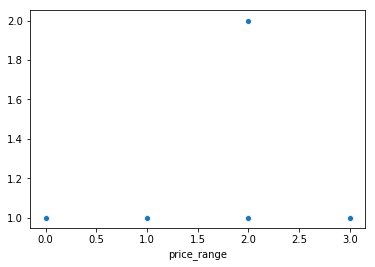

In [88]:
sns.scatterplot(y_test,grid_pred)#how scatter plot isnt linear pfft

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


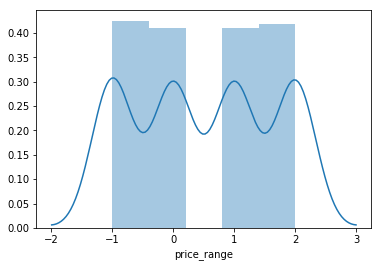

In [89]:
sns.distplot(y_test-grid_pred)

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


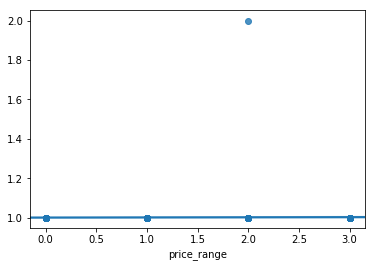

In [90]:
sns.regplot(y_test,grid_pred)

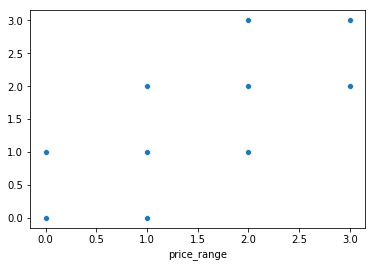

In [91]:
sns.scatterplot(y_test,y_pred)

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


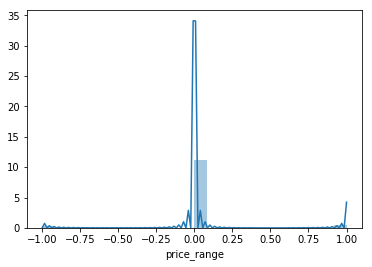

In [92]:
sns.distplot(y_test-y_pred)

C:\Users\Honour Jesus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


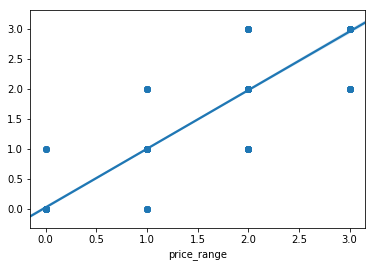

In [93]:
sns.regplot(y_test,y_pred)

In [95]:
#open a file to store your data
import pickle
file=open('mobile_classification_model.pkl','wb')
#dump information to the file
pickle.dump(nsvm, file)